# Final Project

### Import the required libraries

In [2]:
import piplite
await piplite.install(['numpy', 'pandas', 'seaborn', 'scipy', 'statsmodels'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats  # Import scipy.stats with the alias 'stats'
import statsmodels.api as sm
from statsmodels.formula.api import ols
import io
from js import fetch

### Read the dataset from the URL

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

### Task 1: Explore the data

In [5]:
# Check the first few rows and general structure of the dataset
print(boston_df.head())
print(boston_df.info())
print(boston_df.describe())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

### Task 2: Descriptive Statistics and Visualizations

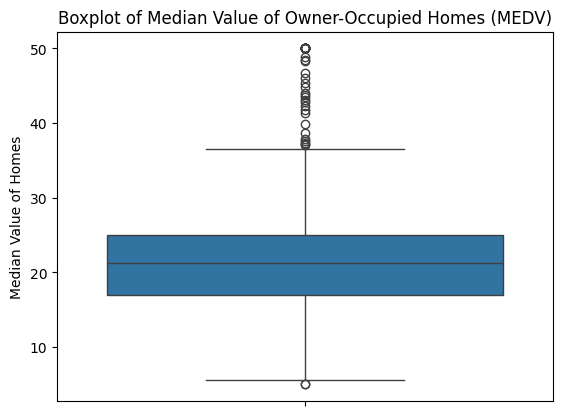

In [6]:
# Box plot for MEDV
sns.boxplot(y=boston_df["MEDV"])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value of Homes")
pyplot.show()

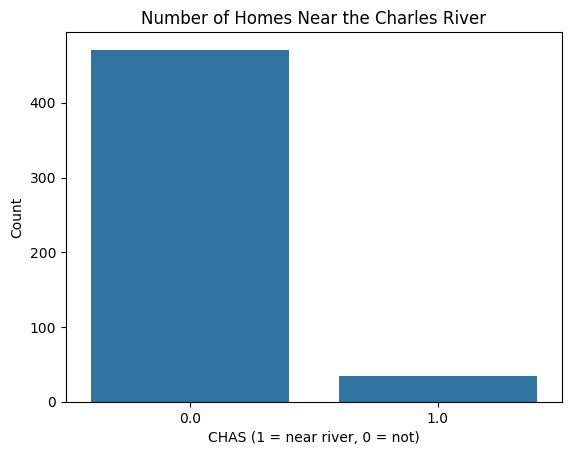

In [7]:
# Bar plot for CHAS
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Number of Homes Near the Charles River")
pyplot.xlabel("CHAS (1 = near river, 0 = not)")
pyplot.ylabel("Count")
pyplot.show()

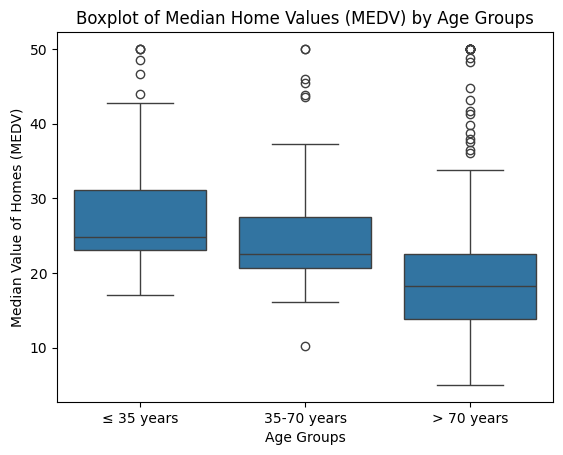

In [8]:
# Create a new column with age groups
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], labels=["≤ 35 years", "35-70 years", "> 70 years"])

# Box plot of MEDV by age groups
sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
pyplot.title("Boxplot of Median Home Values (MEDV) by Age Groups")
pyplot.xlabel("Age Groups")
pyplot.ylabel("Median Value of Homes (MEDV)")
pyplot.show()

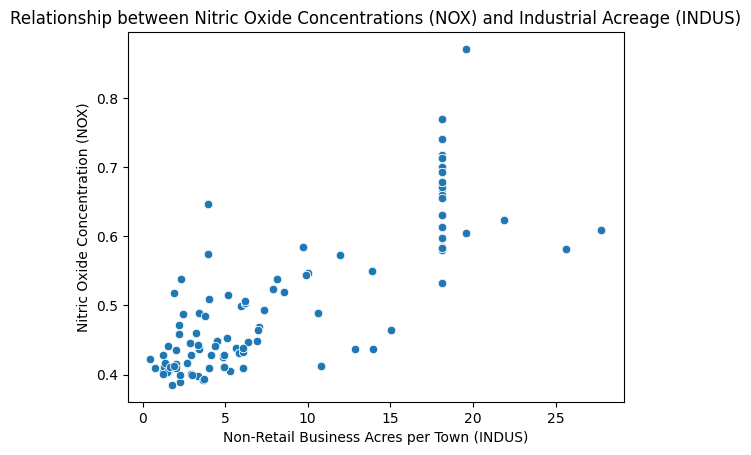

In [9]:
# Scatter plot between NOX and INDUS
sns.scatterplot(x=boston_df["INDUS"], y=boston_df["NOX"])
pyplot.title("Relationship between Nitric Oxide Concentrations (NOX) and Industrial Acreage (INDUS)")
pyplot.xlabel("Non-Retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()

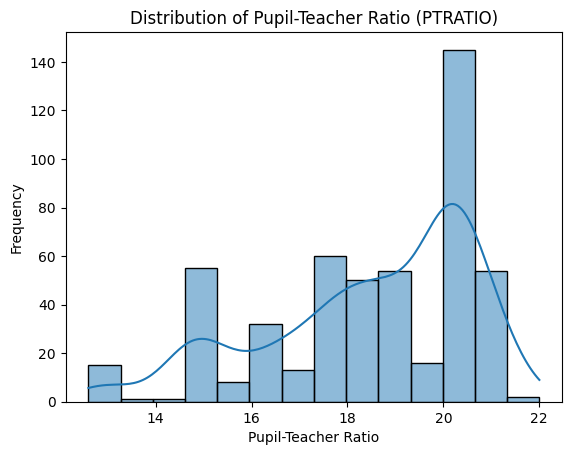

In [10]:
# Histogram of PTRATIO
sns.histplot(boston_df["PTRATIO"], kde=True)
pyplot.title("Distribution of Pupil-Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()

### Task 3: Statistical Tests

In [11]:
# T-test for MEDV by CHAS
# Hypotheses
# H0: There is no significant difference in median home value (MEDV) between homes near and not near the Charles River (CHAS).
# H1: There is a significant difference in median home value (MEDV) between homes near and not near the Charles River.

river_homes = boston_df[boston_df["CHAS"] == 1]["MEDV"]
non_river_homes = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_val = stats.ttest_ind(river_homes, non_river_homes)
print("T-Test for MEDV by CHAS")
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Conclusion
if p_val < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant difference in median home values based on proximity to the Charles River.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant difference in median home values based on proximity to the Charles River.")

T-Test for MEDV by CHAS
t-statistic: 3.996437466090509
p-value: 7.390623170519905e-05
Conclusion: We reject the null hypothesis. There is a significant difference in median home values based on proximity to the Charles River.


In [12]:
# ANOVA for MEDV by AGE_GROUP
# Hypotheses
# H0: There are no significant differences in median home value (MEDV) between the different age groups.
# H1: There are significant differences in median home value (MEDV) between at least two age groups.

model = ols("MEDV ~ C(AGE_GROUP)", data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA for MEDV by AGE_GROUP")
print(anova_table)

# Conclusion
p_val_anova = anova_table["PR(>F)"].iloc[0]
if p_val_anova < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant difference in median home values among age groups.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant difference in median home values among age groups.")

ANOVA for MEDV by AGE_GROUP
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: We reject the null hypothesis. There is a significant difference in median home values among age groups.


In [13]:
# Pearson Correlation between NOX and INDUS
# Hypotheses
# H0: There is no significant correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).
# H1: There is a significant correlation between nitric oxide concentration (NOX) and the proportion of non-retail business acres.

corr, p_val_corr = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Pearson Correlation between NOX and INDUS")
print("Correlation Coefficient:", corr)
print("p-value:", p_val_corr)

# Conclusion
if p_val_corr < 0.05:
    print("Conclusion: We reject the null hypothesis. There is a significant correlation between NOX and INDUS.")
else:
    print("Conclusion: We fail to reject the null hypothesis. There is no significant correlation between NOX and INDUS.")

Pearson Correlation between NOX and INDUS
Correlation Coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
Conclusion: We reject the null hypothesis. There is a significant correlation between NOX and INDUS.


In [14]:
# Linear Regression between DIS and MEDV
# Hypotheses
# H0: There is no significant impact of weighted distance to employment centers (DIS) on median home value (MEDV).
# H1: There is a significant impact of weighted distance to employment centers (DIS) on median home value (MEDV).

X = boston_df["DIS"]
y = boston_df["MEDV"]
X = sm.add_constant(X)  # Add constant for the intercept

model = sm.OLS(y, X).fit()
print("Linear Regression between DIS and MEDV")
print(model.summary())

# Extract the coefficient and interpret the impact
dis_coef = model.params['DIS']
print("The coefficient for DIS is:", dis_coef)
if dis_coef < 0:
    print("Interpretation: An increase in the distance from employment centers is associated with a decrease in median home value.")
else:
    print("Interpretation: An increase in the distance from employment centers is associated with an increase in median home value.")

Linear Regression between DIS and MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        09:48:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        